In [1]:
text = 'Pembangunan ekonomi tahun 2023 akan dilaksanakan untuk mendukung proses transformasi ekonomi setelah pada tahun sebelumnya dihadapkan pada pemulihan ekonomi dan penanganan pandemi COVID-19. Tahun 2023 merupakan momentum untuk menciptakan horizon baru pembangunan dengan menekankan pada strategi mewujudkan SDM berdaya saing, produktivitas sektor ekonomi, ekonomi hijau, transformasi digital, integrasi perekonomian domestik, dan pemindahan IKN. Proses transformasi ekonomi yang dilaksanakan oleh sektor energi, sumber daya air, UMKM, pariwisata, pertanian, industri, perdagangan, keuangan, dan sektor lainnya akan menghadapi tantangan yang membutuhkan kebijakan dan strategi untuk dapat mencapai sasaran pembangunan nasional. Untuk mendukung pemenuhan kebutuhan energi dengan mengutamakan peningkatan Energi Baru Terbarukan (EBT), tantangan yang dihadapi terkait fokus produktivitas adalah tingginya ketergantungan terhadap energi fosil yang produktivitasnya semakin menurun dan berkontribusi terhadap defisit perdagangan dan nilai transaksi berjalan yang turut menurunkan potensi pertumbuhan ekonomi nasional. Tantangan yang terkait fokus pembangunan berkelanjutan adalah (1) pengembangan EBT masih terkendala dengan belum kompetitifnya harga jual dan (2) pengembangan EBT berbasis kelapa sawit masih bersinggungan dengan isu konservasi dan keberlanjutan. Adapun tantangan yang terkait fokus inklusif yaitu (1) kebijakan subsidi dan insentif yang belum optimal, (2) kondisi kelistrikan yang over-supply di beberapa daerah sementara akses masyarakat daerah tertinggal pada energi khususnya EBT skala kecil masih sangat terbatas dengan adanya keterbatasan kewenangan pemerintah daerah, dan (3) faktor intermittence dari beberapa teknologi Pembangkit Listrik Teknologi (PLT) EBT. Indikator target sasaran prioritas nasional rencana kerja pemerintah rkp rpjmn rencana pembangunan jangka menengah'

In [6]:
from biotagging import text_to_tagDF

tagready_df = text_to_tagDF(pd.Series([text]))

ImportError: cannot import name 'convertToSpacy' from 'biotagging' (c:\Kuliah\Magang\linked-data-nlp\biotagging.py)

In [10]:
tagready_df

,token_1,BIO_tag_1
0,Pembangunan,
1,,O
2,ekonomi,
3,,O
4,tahun,
...,...,...
496,pembangunan,
497,,O
498,jangka,
499,,O


In [7]:
link_for_save = "text_tagged.csv"
tagready_df.to_csv(link_for_save , index=False)

In [1]:
from convert import convert_to_spaCyformat
import pandas as pd

In [2]:
annotations = sorted([
    'rkp',
    'rpjmn',
    'predikat',
    'pn',
    'datain',
    'sasaran'
])

dftagged = pd.read_csv('text_tagged.csv')

In [3]:
dftagged.dropna(inplace=True)

In [4]:
dftagged

,token_1,BIO_tag_1
0,Pembangunan,o
2,ekonomi,o
4,tahun,o
6,2023,o
8,akan,O
...,...,...
475,rpjmn,b-rpjmn
477,rencana,b-rpjmn
479,pembangunan,i-rpjmn
481,jangka,i-rpjmn


In [5]:
train_data = convert_to_spaCyformat(dftagged, annotations)

In [6]:
train_data

['Pembangunanekonomitahun2023akandilaksanakanuntukmendukungprosestransformasiekonomisetelahpadatahunsebelumnyadihadapkanpadapemulihanekonomidanpenangananpandemiCOVID-19.Tahun2023merupakanmomentumuntukmenciptakanhorizonbarupembangunandenganmenekankanpadastrategimewujudkanSDMberdayasaingproduktivitassektorekonomiekonomihijautransformasidigitalintegrasiperekonomiandomestikdanpemindahanIKNProsestransformasiekonomiyangdilaksanakanolehsektorenergisumberdayaairUMKMpariwisatapertanianindustriperdagangankeuangandanakanyangdanuntukdapatmencapaisasaranpembangunannasional.UntukmendukungpemenuhankebutuhanenergidenganmengutamakanpeningkatanEnergiBaruTerbarukan(EBT)tantanganyangdihadapiterkaitfokusproduktivitasadalahtingginyaketergantunganterhadapenergifosilyangproduktivitasnyasemakinmenurundanberkontribusiterhadapdefisitperdagangandannilaitransaksiberjalanyangturutmenurunkanpotensipertumbuhanekonominasional.Tantanganyangterkaitfokuspembangunanberkelanjutanadalah(1)pengembanganEBTmasihterkendaladenga

In [7]:
from train_spacy import train_spacy

Starting iteration 0
{'ner': 6.95054803788662}
Starting iteration 1
{'ner': 6.871861483901739}
Starting iteration 2


c:\Users\Fadil\anaconda3\envs\tf\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pembangunanekonomitahun2023akandilaksanakanuntukme..." with entities "[(538, 545, 'sasaran'), (632, 652, 'datain'), (653...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


{'ner': 6.778069246560335}
Starting iteration 3
{'ner': 6.664375454187393}
Starting iteration 4
{'ner': 6.562712138518691}
Starting iteration 5
{'ner': 6.411454821005464}
Starting iteration 6
{'ner': 6.185427196323872}
Starting iteration 7
{'ner': 5.808193681761622}
Starting iteration 8
{'ner': 5.7170869167894125}
Starting iteration 9
{'ner': 4.56855701841414}
Starting iteration 10
{'ner': 4.143666062504053}
Starting iteration 11
{'ner': 3.1608036253601313}
Starting iteration 12
{'ner': 2.1620181426405907}
Starting iteration 13
{'ner': 0.8584939939901233}
Starting iteration 14
{'ner': 0.5126307886093855}
Starting iteration 15
{'ner': 0.4057180539239198}
Starting iteration 16
{'ner': 0.06929645812488161}
Starting iteration 17
{'ner': 0.03568204395924113}
Starting iteration 18
{'ner': 0.0159715435264971}
Starting iteration 19
{'ner': 0.008921265529703737}
Starting iteration 20
{'ner': 9.042214081929345e-05}
Starting iteration 21
{'ner': 4.194689551807393e-05}
Starting iteration 22
{'ner'

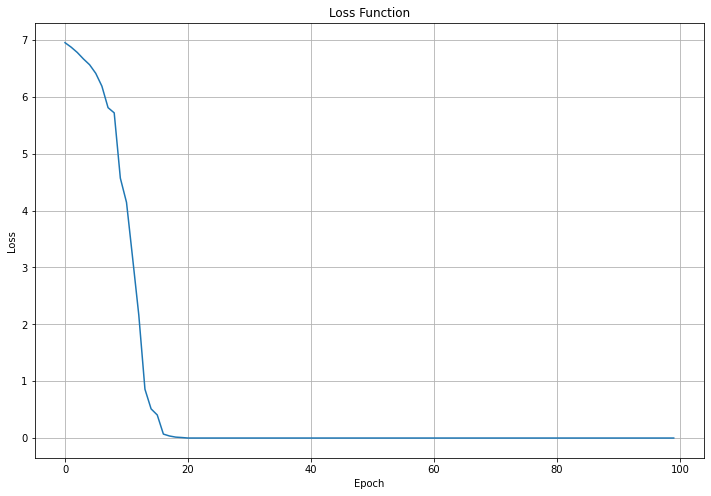

In [8]:
model, loss = train_spacy([train_data], 100) # using 100 iterations

# we'd like to plot loss
from matplotlib import pyplot as plt

# plotting loss
plt.figure(figsize=(12,8))
plt.plot([i['ner'] for i in loss])
plt.grid()
plt.title('Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
model.to_disk("model")

In [15]:
from spacy import load, displacy

# import model
link_to_model = "model"
loaded_model = load(link_to_model)

test_text = """ dan pemindahan IKN. Proses transformasi ekonomi yang dilaksanakan oleh sektor energi, sumber daya air, UMKM, pariwisata, pertanian, industri, perdagangan, keuangan, dan sektor lainnya akan menghadapi tantangan yang membutuhkan kebijakan dan strategi untuk dapat mencapai sasaran pembangunan nasional. Untuk mendukung pemenuhan kebutuhan energi dengan mengutamakan peningkatan Energi Baru Terbarukan (EBT), tantangan yang dihadapi terkait fokus produktivitas adalah tingginya ketergantungan terhadap energi fosil yang produktivitasnya semakin menurun dan berkontribusi terhadap defisit perdagangan dan nilai transaksi berjalan yang turut menurunkan potensi pertumbuhan ekonomi nasional. Tantangan yang terkait fokus pembangunan berkelanjutan adalah (1) pengembangan EBT masih terkendala dengan belum kompetitifnya harga jual dan (2) pengembangan EBT berbasis kelapa sawit masih bersinggungan dengan isu konservasi dan keberlanjutan. Adapun tantangan yang terkait fokus inklusif yaitu (1) kebijakan subsidi dan insentif yang belum optimal, (2) kondisi kelistrikan yang over-supply di beberapa daerah sementara akses masyarakat daerah tertinggal pada energi khususnya EBT skala kecil masih sangat terbatas dengan adanya keterbatasan kewenangan pemerintah daerah, dan (3) faktor intermittence dari beberapa teknologi Pembangkit Listrik Teknologi (PLT) EBT. Indikator target sasaran prioritas nasional rencana kerja pemerintah rkp rpjmn rencana pembangunan jangka menengah"""

# show the results
doc = loaded_model(test_text)
displacy.render(doc, style="ent")